In [1]:
# Moving object
struct shot
    x
    y
    ddx
    ddy
end

In [2]:
# Static object
struct fort
    x
    y
end

In [18]:
# Update a shot
dt = 0.1
function update(s::shot)
    x = s.x + dt*s.ddx
    y = s.y + dt*s.ddy
    ddy = s.ddy - dt*0.98
    ddx = s.ddx
    return shot(x,y, ddx, ddy)
end

update (generic function with 2 methods)

In [4]:
# Update fort
function update(s::fort)
    return fort(s.x,s.y)
end


update (generic function with 2 methods)

In [5]:
# Calculate punishment as minimum square distance
function reward(scene,reward)
    if -sum(([scene[1].x scene[1].y] .- [scene[2].x scene[2].y]).^2) > reward
        reward = -sum(([scene[1].x scene[1].y] .- [scene[2].x scene[2].y]).^2)
    end
    return reward
end

reward (generic function with 1 method)

In [6]:
# Scene vector contains all objects in the world
scene = []

Any[]

In [7]:
# Simulate world and return reward
function simulatereward(scene, time)
    r = -9999999
    for tstep = 1:time
        scene = update.(scene)
        r = reward(scene,r)
    end
    return r 
end

simulatereward (generic function with 1 method)

In [8]:
# Simulate the world and return positions per time step for ploting
function simulateandsave(scene,time)  
    xmat = zeros(length(scene),time)
    ymat = zeros(length(scene),time)
    for tstep = 1:time
        for i in 1:length(scene)
            xmat[i,tstep] = scene[i].x
            ymat[i,tstep] = scene[i].y
        end
        scene = update.(scene)
    end
    return xmat,ymat
end

simulateandsave (generic function with 1 method)

### Example 1

In [9]:
# Example 1
# Initialize world from vertical velocity and return reward
function interception(ddy0)
    scene = []
    fort1 = fort(50.0, 0.0)
    dx = 10
    dy = ddy0
    shot2 = shot(0.0, 0.0, dx, dy)
    scene = [fort1 shot2]
    r = simulatereward(scene, 100)
    return r
end

interception (generic function with 1 method)

In [10]:
# Makie.jl would look nicer than Plots...
using Plots
function plotscene(scene)
    xpos, ypos = simulateandsave(scene, 100)
    Plots.plot(xpos', ypos', xlims=(-1, 51), ylims=(-5, 5))
end

plotscene (generic function with 1 method)

In [11]:
# Our AD libray - does not handle Mutation. Enzymer does, but bad documentation so far
using Zygote

In [19]:
# Full training loop using GD
lr = 0.0001
ddy0 = 0.1 
for i=1:1000
    ddy0 = ddy0 + lr * interception'(ddy0)
end

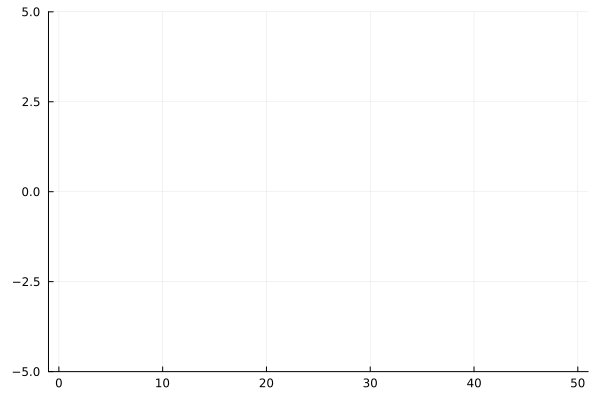

In [13]:
# Values and plot
ddy0
interception(ddy0)
interception'(ddy0)
plotscene(scene)

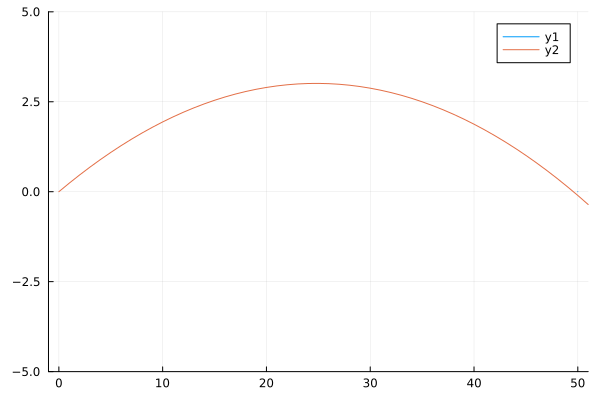

In [20]:
# Set up scene as in interception again and plot
scene = []
fort1 = fort(50.0,0.0)
dx = 10
dy = ddy0
shot2 = shot(0.0,0.0,dx,dy)
scene = [fort1 shot2]
plotscene(scene)


### Example 2

In [24]:
# Example 2
# Create scene instead based on angle with fixed velocity
function interception2(angle)
    scene = []
    fort1 = fort(50.0, 0.0)
    p = 15.0
    ddx = p * cos(angle)
    ddy = p * sin(angle)
    shot1 = shot(0.0, 0.0, ddx, ddy)
    scene = [fort1 shot1]
    r = simulatereward(scene, 100)
    return r
end

interception2 (generic function with 1 method)

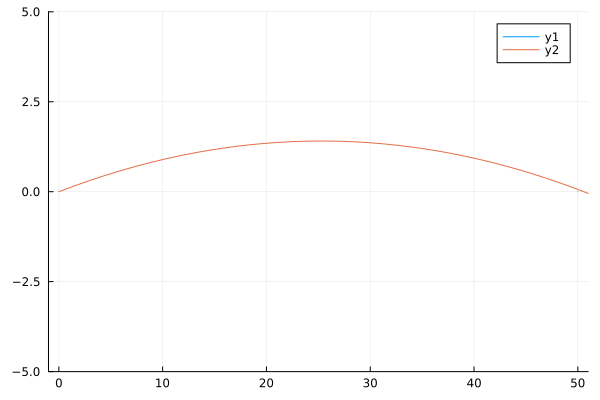

In [44]:
angle = 0.1 # Initial guess in radians

# Training loop
#lr = 0.000001

# SOLUTION: increase learning rate so that it overcomes local extrema 
lr = 0.0005

# SOLUTION: set number of iterations to 100 to avoid overtraining
for i=1:100
    angle = angle + lr * interception2'(angle)
end

# Set up scene as in interception2
scene = []
fort1 = fort(50.0,0.0)
p = 15.0
dx = p*cos(angle)
dy = p*sin(angle)
shot2 = shot(0.0,0.0,dx,dy)
scene = [fort1 shot2]
plotscene(scene)